        category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...
category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


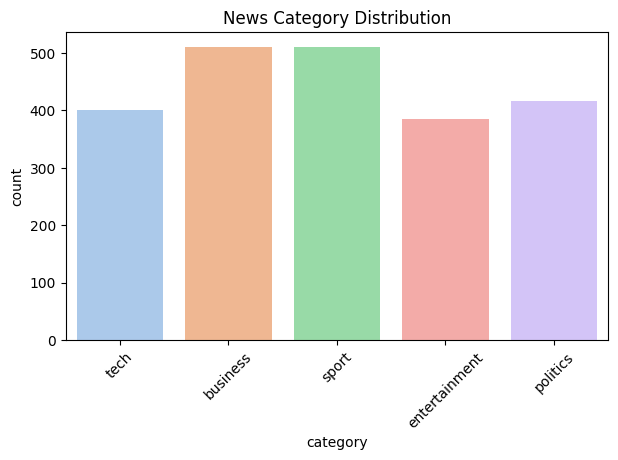

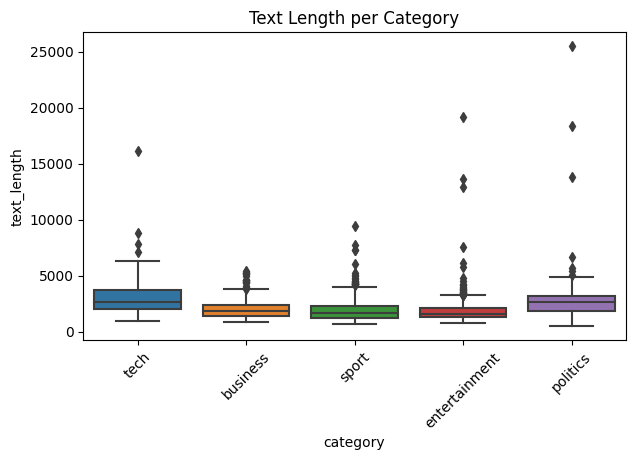

 Overall Skewness of Text Length: 5.64
 Overall Kurtosis of Text Length: 67.34


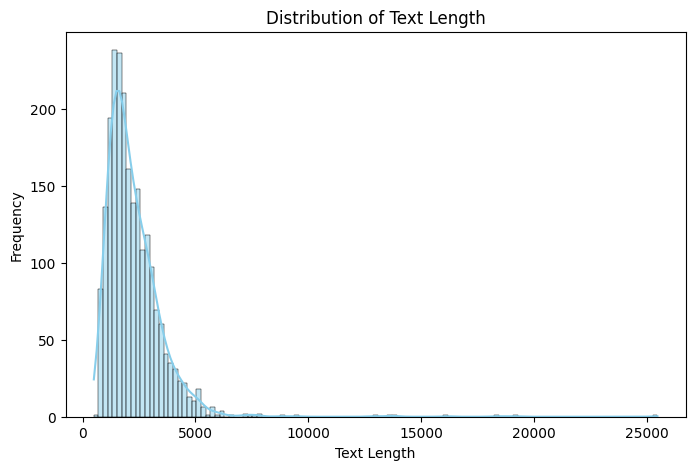


 Logistic Regression Accuracy: 0.97
               precision    recall  f1-score   support

     business       0.96      0.93      0.94       101
entertainment       1.00      0.98      0.99        81
     politics       0.94      0.98      0.96        83
        sport       0.98      1.00      0.99        98
         tech       0.98      0.98      0.98        82

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445


 Naïve Bayes Accuracy: 0.96
               precision    recall  f1-score   support

     business       0.95      0.92      0.93       101
entertainment       0.99      0.91      0.95        81
     politics       0.90      0.98      0.94        83
        sport       0.99      1.00      0.99        98
         tech       0.95      0.96      0.96        82

     accuracy                           0.96       445
    macro avg       0.96      0.95      0.95     

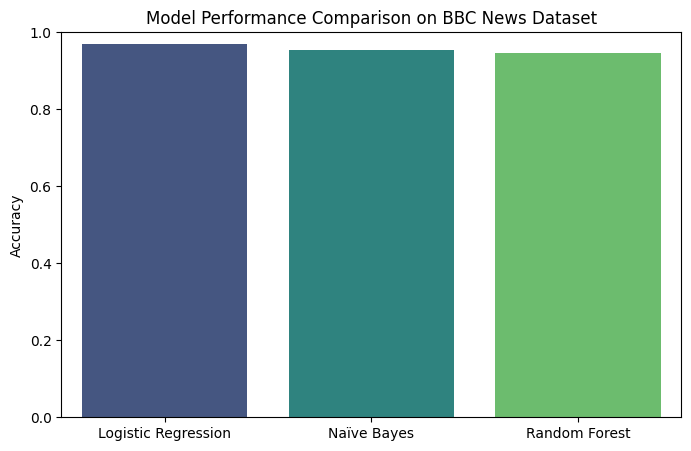

In [6]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis  # ✨ Added for skewness and kurtosis

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

# 📥 Load Dataset
df = pd.read_csv("/kaggle/input/bbc-news/bbc-text.csv")  # Change this to your actual file name

# 🧾 Preview Dataset
print(df.head())
print(df['category'].value_counts())

# ➕ Text Length (for Visualization)
df['text_length'] = df['text'].apply(len)

# 📊 Plot Category Distribution
plt.figure(figsize=(7, 4))
sns.countplot(x='category', data=df, palette="pastel")
plt.title("News Category Distribution")
plt.xticks(rotation=45)
plt.show()

# 📦 Boxplot for Text Length
plt.figure(figsize=(7, 4))
sns.boxplot(x='category', y='text_length', data=df)
plt.title("Text Length per Category")
plt.xticks(rotation=45)
plt.show()

# 📈 Skewness and Kurtosis
overall_skewness = skew(df['text_length'])
overall_kurtosis = kurtosis(df['text_length'])

print(f" Overall Skewness of Text Length: {overall_skewness:.2f}")
print(f" Overall Kurtosis of Text Length: {overall_kurtosis:.2f}")

# 📉 Plot Distribution of Text Length
plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], kde=True, color="skyblue")
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

# 🔠 TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df['text'])
y = df['category']

# 🔀 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "Naïve Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# 📈 Train & Evaluate
model_accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc

    print(f"\n {name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))

# 📊 Accuracy Comparison Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison on BBC News Dataset")
plt.show()


In [7]:
from scipy.stats import skew, kurtosis, ttest_ind, f_oneway
from statsmodels.stats.weightstats import ztest

# ➕ Text Length
df['text_length'] = df['text'].apply(len)

# 📈 Skewness and Kurtosis
overall_skewness = skew(df['text_length'])
overall_kurtosis = kurtosis(df['text_length'])

print(f" Overall Skewness of Text Length: {overall_skewness:.2f}")
print(f" Overall Kurtosis of Text Length: {overall_kurtosis:.2f}")

# 🔬 Statistical Tests

# Split into two categories for Z-test and T-test
business = df[df['category'] == 'business']['text_length']
tech = df[df['category'] == 'tech']['text_length']

# 1. 📏 Z-Test
z_stat, p_val_z = ztest(business, tech)
print(f"\n Z-Test: z-statistic = {z_stat:.2f}, p-value = {p_val_z:.4f}")

# 2. 📏 T-Test
t_stat, p_val_t = ttest_ind(business, tech, equal_var=False)
print(f" T-Test: t-statistic = {t_stat:.2f}, p-value = {p_val_t:.4f}")

# 3. 📏 ANOVA (F-Test) across all categories
groups = [group['text_length'].values for name, group in df.groupby('category')]
f_stat, p_val_f = f_oneway(*groups)
print(f" ANOVA (F-Test): F-statistic = {f_stat:.2f}, p-value = {p_val_f:.4f}")


 Overall Skewness of Text Length: 5.64
 Overall Kurtosis of Text Length: 67.34

 Z-Test: z-statistic = -13.59, p-value = 0.0000
 T-Test: t-statistic = -12.84, p-value = 0.0000
 ANOVA (F-Test): F-statistic = 64.10, p-value = 0.0000



 Error Analysis for Logistic Regression


<Figure size 700x500 with 0 Axes>

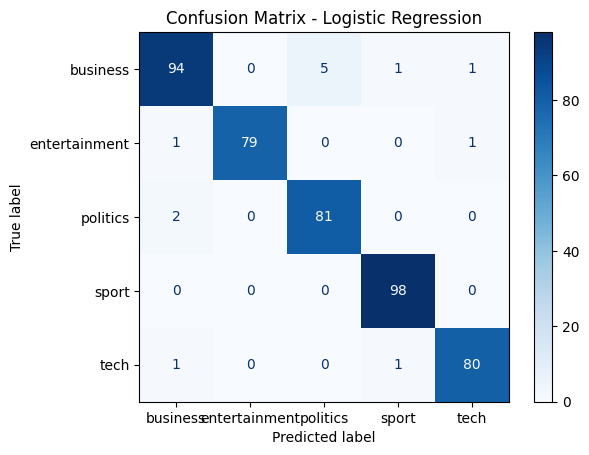

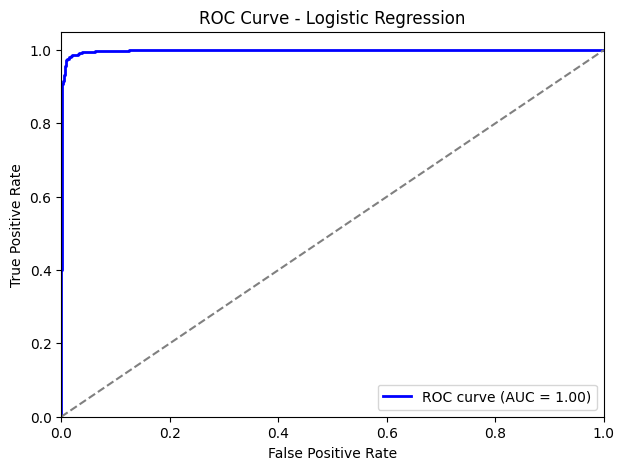

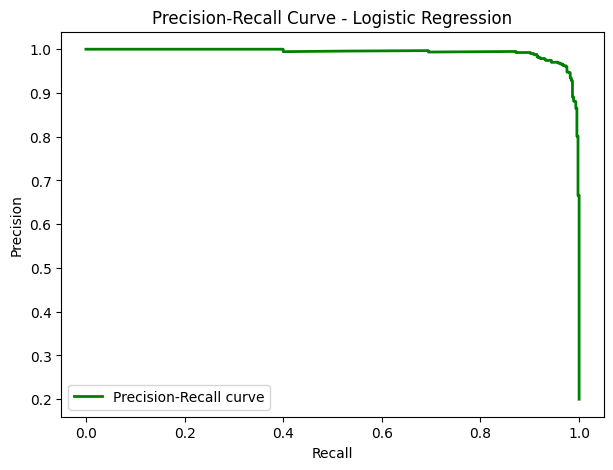

❌ Number of Misclassified Samples: 13
             Actual Predicted
962   entertainment      tech
2201       business  politics
585            tech     sport
602        business  politics
275        politics  business

 Error Analysis for Naïve Bayes


<Figure size 700x500 with 0 Axes>

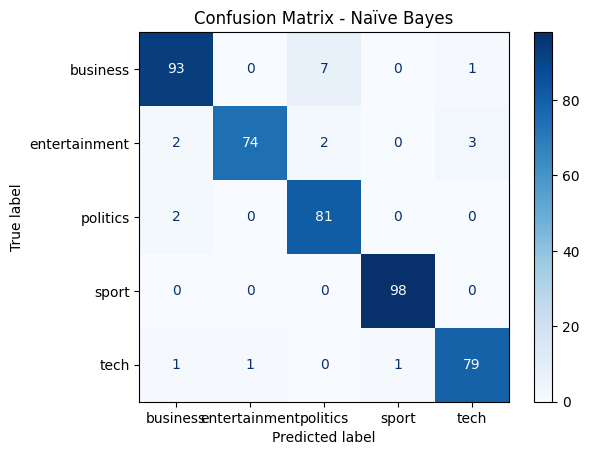

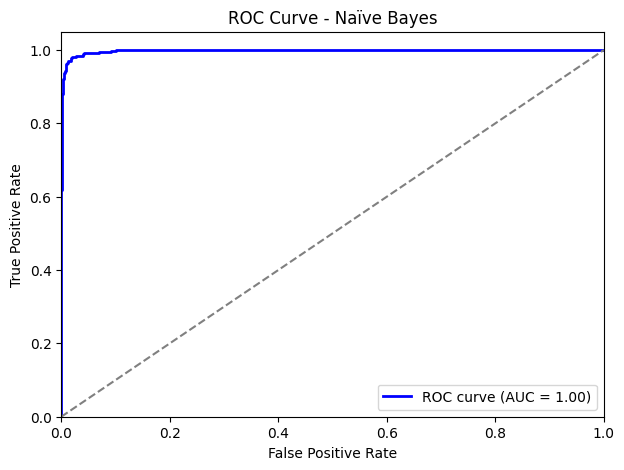

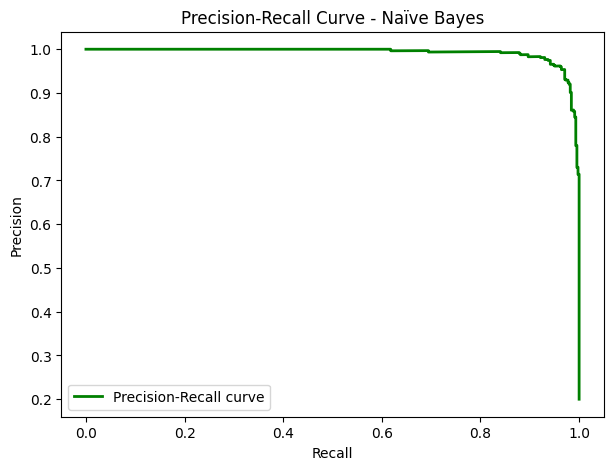

❌ Number of Misclassified Samples: 20
             Actual Predicted
2179  entertainment  politics
1827       business  politics
677        politics  business
1207  entertainment  business
2201       business  politics

 Error Analysis for Random Forest


<Figure size 700x500 with 0 Axes>

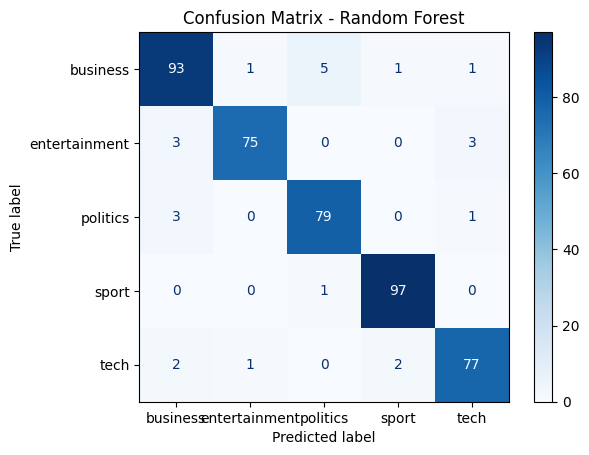

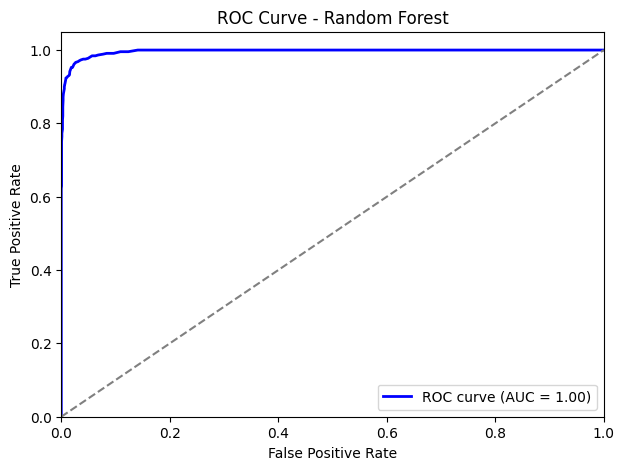

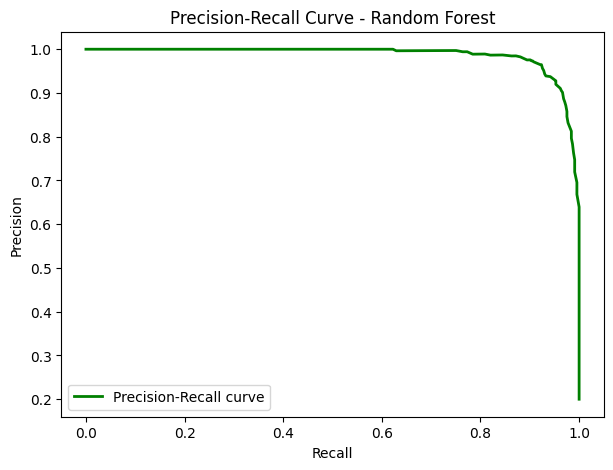

❌ Number of Misclassified Samples: 24
             Actual Predicted
230   entertainment  business
2201       business  politics
445        politics  business
1702       business  politics
585            tech     sport


In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize

# 🛠️ Error Analysis & ROC/Precision-Recall for each model
for name, model in models.items():
    print(f"\n Error Analysis for {name}")

    # Predict values
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)  # For ROC curve

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    plt.figure(figsize=(7, 5))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # ROC Curve - Calculate and plot
    # One-hot encoding for multi-class classification
    y_test_bin = label_binarize(y_test, classes=model.classes_)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())  # Ravel to flatten arrays
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_prob.ravel())
    plt.figure(figsize=(7, 5))
    plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {name}')
    plt.legend(loc='lower left')
    plt.show()

    # Print Misclassified Samples
    # Convert sparse matrix X_test to dense format for proper indexing
    X_test_dense = X_test.toarray()  # Convert to dense array if it's sparse
    misclassified = X_test_dense[y_test != y_pred]
    print(f"❌ Number of Misclassified Samples: {misclassified.shape[0]}")

    # Display a few wrong predictions
    wrong_df = pd.DataFrame({
        'Actual': y_test[y_test != y_pred],
        'Predicted': y_pred[y_test != y_pred]
    })
    print(wrong_df.sample(5))  # Show 5 random misclassifications
